# Exploratory Data Analysis on Wine Quality 

#### Date: 05-09-23
#### Author: Pragya Mishra 

##### Reading all the required libraries

In [55]:
# basic libraries / data processing
import numpy as np
import pandas as pd
import os

# graphical visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# preprocessing
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [45]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting

Reading the data file

In [46]:
os.chdir('C:\\Users\\mishr\\OneDrive\\Desktop\\Stat Methods Coursework')

In [47]:
df = pd.read_excel('winequality-red.xlsx')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### a. What is the sample size?

In [48]:
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1599 rows and 12 columns


##### The sample size is 1599 

### b. Any outliers? Do you have any concerns about the data quality?


##### 1. Lets study the data and check the data quality 

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


##### Check for missing values

In [50]:

missing_values = df.isnull().sum()
print(missing_values)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


##### Checking for duplicates

In [51]:

duplicate_rows = df[df.duplicated()]
print(duplicate_rows)


      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4               7.4             0.700         0.00            1.90      0.076   
11              7.5             0.500         0.36            6.10      0.071   
27              7.9             0.430         0.21            1.60      0.106   
40              7.3             0.450         0.36            5.90      0.074   
65              7.2             0.725         0.05            4.65      0.086   
...             ...               ...          ...             ...        ...   
1563            7.2             0.695         0.13            2.00      0.076   
1564            7.2             0.695         0.13            2.00      0.076   
1567            7.2             0.695         0.13            2.00      0.076   
1581            6.2             0.560         0.09            1.70      0.053   
1596            6.3             0.510         0.13            2.30      0.076   

      free sulfur dioxide  

##### 2. Check for outliers in the data 

To check for outliers in the data, we can start from understanding the point estimates mainly the mean and median of each variable.
We now calculate the mean and median for each column and compare it to find if we have outlier in the data. 


In [66]:
print(df.mean(numeric_only=True))

fixed acidity            8.319637
volatile acidity         0.527821
citric acid              0.270976
residual sugar           2.538806
chlorides                0.087467
free sulfur dioxide     15.874922
total sulfur dioxide    46.467792
density                  0.996747
pH                       3.311113
sulphates                0.658149
alcohol                 10.422983
quality                  5.636023
dtype: float64


In [67]:
print(df.median(numeric_only=True))

fixed acidity            7.90000
volatile acidity         0.52000
citric acid              0.26000
residual sugar           2.20000
chlorides                0.07900
free sulfur dioxide     14.00000
total sulfur dioxide    38.00000
density                  0.99675
pH                       3.31000
sulphates                0.62000
alcohol                 10.20000
quality                  6.00000
dtype: float64


##### Observation

Variables: 'fixed acidity', 'free sulfur dioxide', 'total sulfur dioxide', 'quality' have slight different mean and median across, so we observe that they have significant outliers in the data 


##### To check the outliers in the data better with corresponding to the target variable 'quality' we can plot the boxplots and analyse the outliers in detail

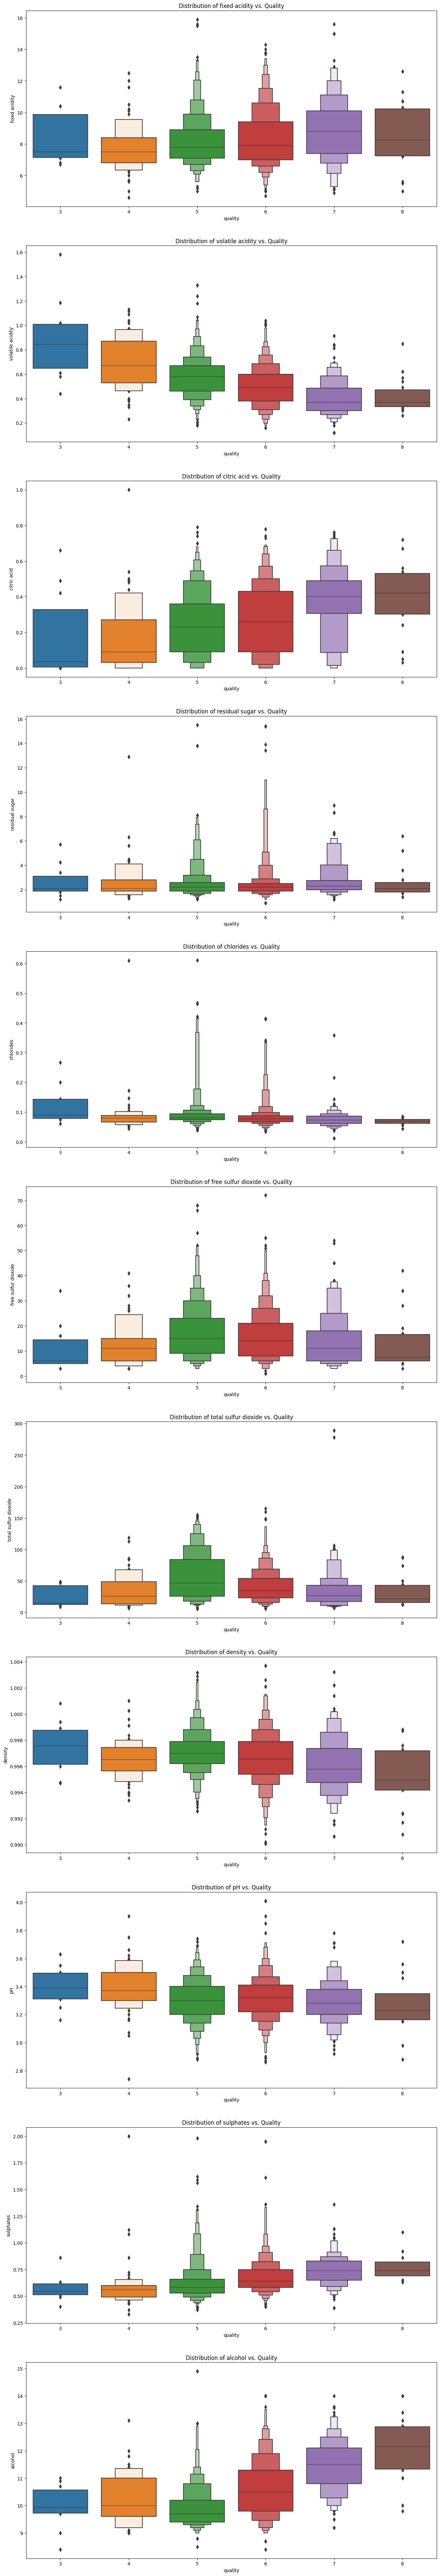

In [76]:
# Checking for outlier data


fig, axes = plt.subplots(nrows=11, ncols=1, figsize=(16, 100))
# plt.subplots_adjust(hspace=1)
for ax, col in zip(axes.flat, df.columns[:-1]):
    sns.boxenplot(data=df, y=col, x="quality", ax=ax)
    ax.set_title(f"Distribution of {col} vs. Quality")

plt.show()

##### Observation:

We see that - variables -  'fixed acidity', 'free sulfur dioxide', 'total sulfur dioxide' have outliers mainly where wine quality is with score - 5 to 7

We can use scatter plot as well to check the outliers in the data

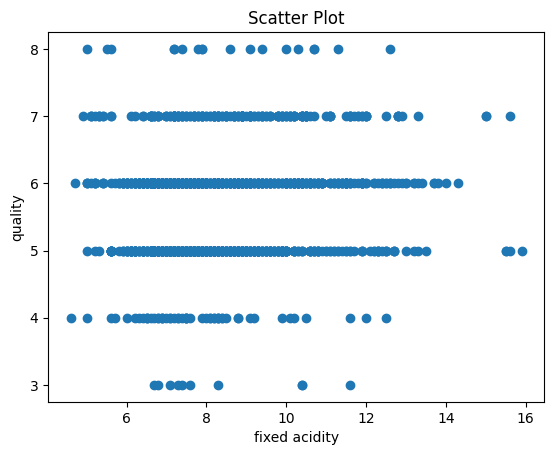

In [54]:
# Create scatter plot
plt.scatter(df['fixed acidity'], df['quality'])
plt.title('Scatter Plot')
plt.xlabel('fixed acidity')
plt.ylabel('quality')
plt.show()

### c. How can you summarize the data of each variable in a concise way? What statistics are you going to present?


We can use describe() function to better summarize the data in a concise way where we get - mean, max, count and percentiles of the data.
We can also calculate median() and trim_mean() for more statistics as done below

In [19]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [77]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'quality category'],
      dtype='object')

In [73]:
stats.trim_mean(df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']], 0.05)

array([ 8.22248439,  0.52053435,  0.26359473,  2.33171409,  0.08097363,
       15.05100625, 43.58848022,  0.99674212,  3.30984733,  0.64276891,
       10.35678927,  5.63428175])

##### We can also check for the correlation between all the varibles by plotting the correlation matrix and present this statistic

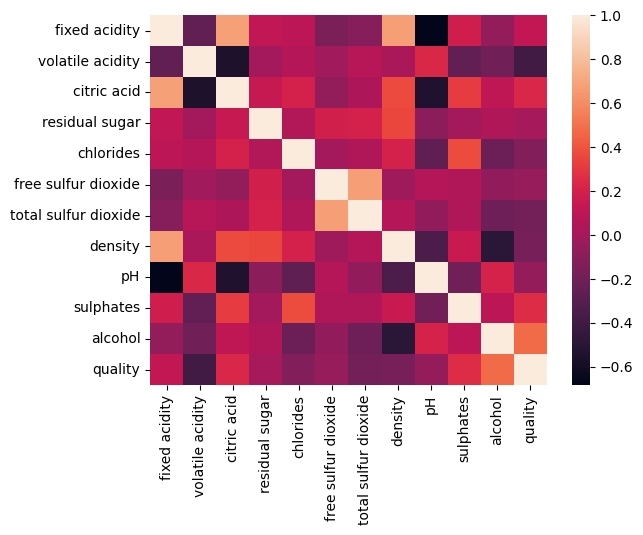

In [68]:
ax = sns.heatmap(df.corr(numeric_only=True))
plt.show()

### d. How can you visualize the distribution of each variable?


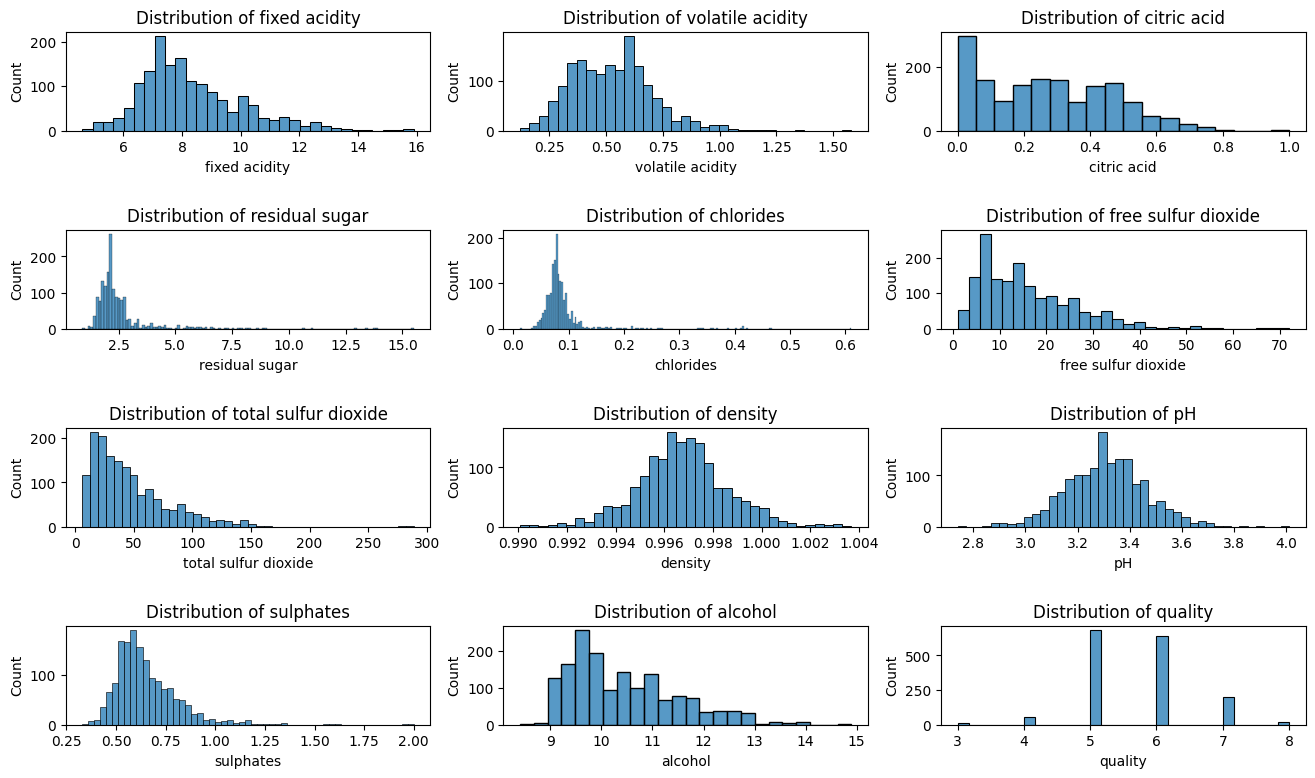

In [20]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(16, 9))
plt.subplots_adjust(hspace=1)

for ax, col in zip(axes.flat, df.columns):
    sns.histplot(data=df, x=col, ax=ax)
    ax.set_title(f"Distribution of {col}")

plt.show()

<Axes: xlabel='quality', ylabel='count'>

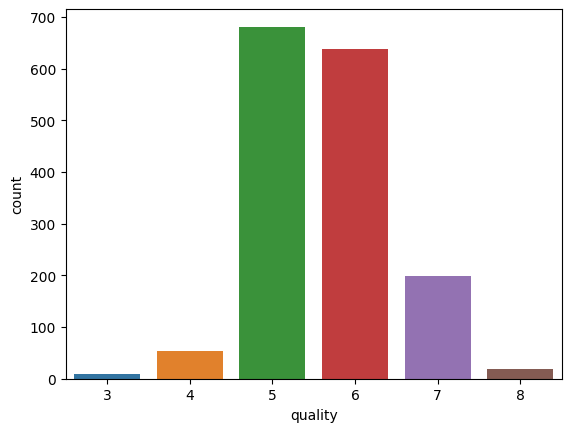

In [81]:
df['quality'].value_counts()#.plot.bar()
sns.countplot(x='quality',data=df)

##### Observation:

We can visualize the distribution for each variable by using histogram as used above
I have also created the target variable "quality" data distribution below for better understanding

### e. Do you see any skewed distributions?

To check for skewness in all the variables, we can check the distribution of variables again

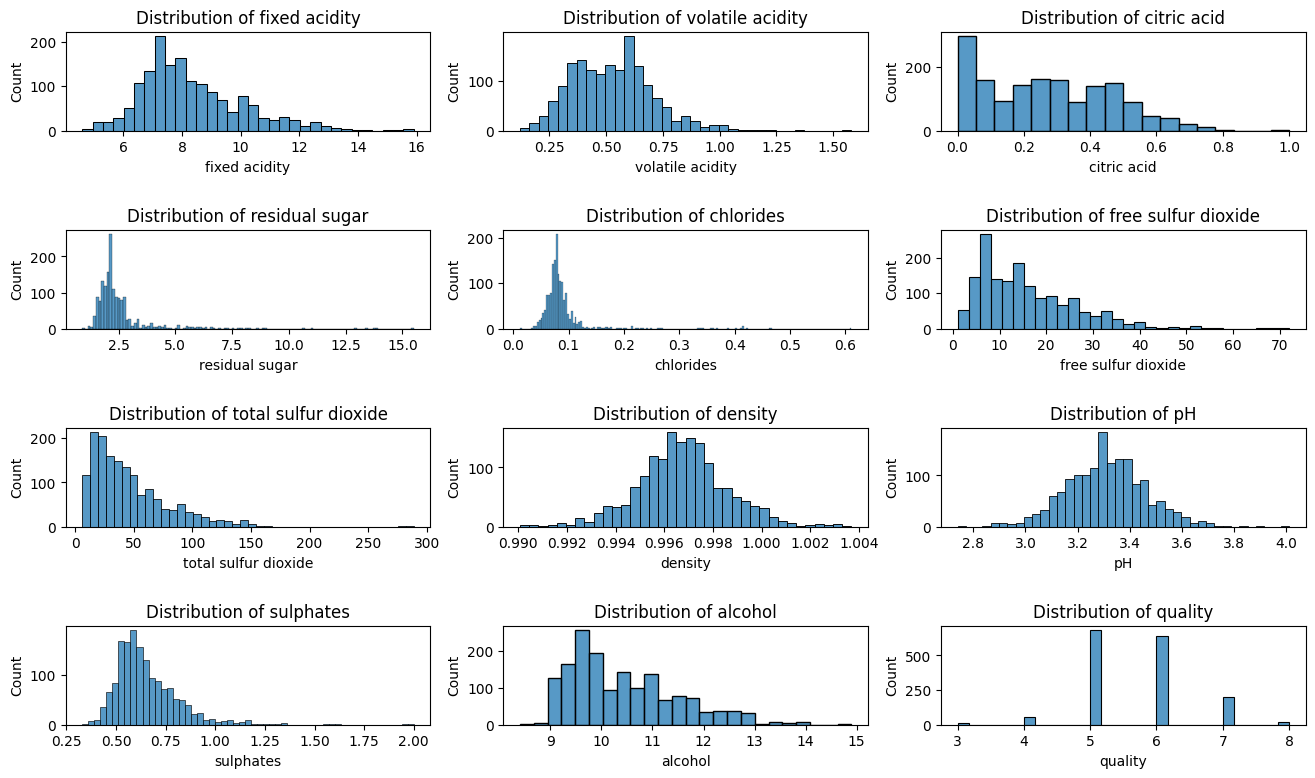

In [78]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(16, 9))
plt.subplots_adjust(hspace=1)

for ax, col in zip(axes.flat, df.columns):
    sns.histplot(data=df, x=col, ax=ax)
    ax.set_title(f"Distribution of {col}")

plt.show()

In [79]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'quality category'],
      dtype='object')

##### Observation:

By analysing the data distribution for all the variables above, we observe that - 
1. Variables - 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
'chlorides', 'free sulfur dioxide', 'total sulfur dioxide','sulphates', 'alcohol' are rightly skewed distribution

2. Variables - 'density','pH', 'quality' are normally distributed variables

##### END